# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](https://github.com/steph-crypt/lab-neural-networks/blob/master/your-code/tttboard.jpg?raw=1)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [3]:
# your code here
from google.colab import files
uploaded = files.upload()


Saving tic-tac-toe.csv to tic-tac-toe (2).csv


class    int64
TL_b     int64
TL_o     int64
TL_x     int64
TM_b     int64
TM_o     int64
TM_x     int64
TR_b     int64
TR_o     int64
TR_x     int64
ML_b     int64
ML_o     int64
ML_x     int64
MM_b     int64
MM_o     int64
MM_x     int64
MR_b     int64
MR_o     int64
MR_x     int64
BL_b     int64
BL_o     int64
BL_x     int64
BM_b     int64
BM_o     int64
BM_x     int64
BR_b     int64
BR_o     int64
BR_x     int64
dtype: object


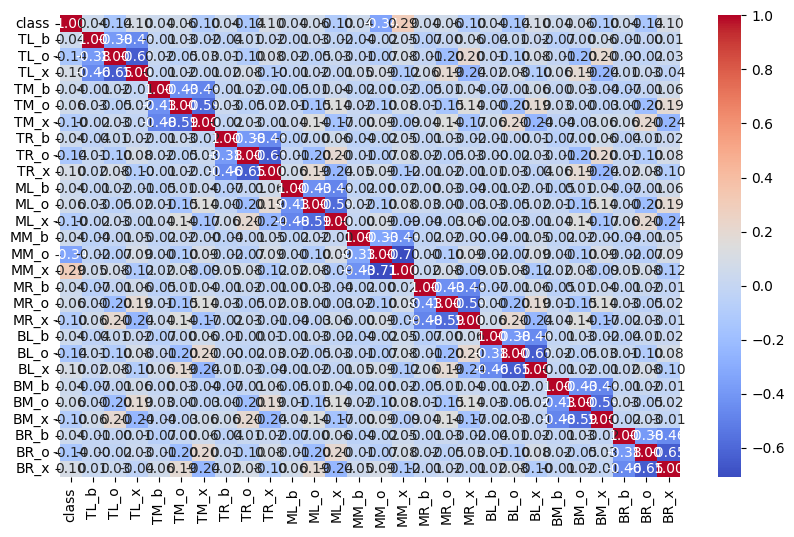

        TL_b      TL_o      TL_x      TM_b      TM_o      TM_x     TR_b  \
0   -0.52177 -0.733294  1.136603 -0.594228 -0.724898  1.238706 -0.52177   
1   -0.52177 -0.733294  1.136603 -0.594228 -0.724898  1.238706 -0.52177   
2   -0.52177 -0.733294  1.136603 -0.594228 -0.724898  1.238706 -0.52177   
3   -0.52177 -0.733294  1.136603 -0.594228 -0.724898  1.238706 -0.52177   
4   -0.52177 -0.733294  1.136603 -0.594228 -0.724898  1.238706 -0.52177   
..       ...       ...       ...       ...       ...       ...      ...   
953 -0.52177  1.363709 -0.879815 -0.594228 -0.724898  1.238706 -0.52177   
954 -0.52177  1.363709 -0.879815 -0.594228 -0.724898  1.238706 -0.52177   
955 -0.52177  1.363709 -0.879815 -0.594228 -0.724898  1.238706 -0.52177   
956 -0.52177  1.363709 -0.879815 -0.594228 -0.724898  1.238706 -0.52177   
957 -0.52177  1.363709 -0.879815 -0.594228  1.379504 -0.807294 -0.52177   

         TR_o      TR_x      ML_b  ...      MR_x      BL_b      BL_o  \
0   -0.733294  1.136603 -0.

In [32]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



game_data = pd.read_csv("tic-tac-toe.csv")
# print(game_data)
game_data.head()
game_data.tail()

columns = ['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR']

#converts all columns to boolean
df_encoded = pd.get_dummies(game_data, columns=columns, drop_first=False)

#detects boolean values and converts to 1 or 0
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

#checks types of columns
print(df_encoded.dtypes)

#checks for correlation in columns
corrolation_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=[10, 6])
sns.heatmap(corrolation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

#splits the data
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

#normalizes the data by scaling it
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

game_data_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(game_data_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


print(y.unique())






## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [44]:
# your code here
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # 1 output for binary classification
])

model.summary()


keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="adam"
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4505 - loss: 0.7530 - val_accuracy: 0.5974 - val_loss: 0.6769
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6598 - loss: 0.6437 - val_accuracy: 0.6818 - val_loss: 0.6286
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6959 - loss: 0.6058 - val_accuracy: 0.7013 - val_loss: 0.6094
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6947 - loss: 0.5832 - val_accuracy: 0.6883 - val_loss: 0.5988
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7445 - loss: 0.5424 - val_accuracy: 0.7468 - val_loss: 0.5762
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7589 - loss: 0.5008 - val_accuracy: 0.7532 - val_loss: 0.5648
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7605 - loss: 0.4973 - val_accuracy: 0.7597 - val_loss: 0.5547
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7937 - loss: 0.4583 - val_accuracy: 0.7662 - val_loss

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [40]:
import numpy as np

# save the trained model
model.save('tictactoe_model.keras')

loaded_model = keras.models.load_model('tictactoe_model.keras')

#select random test samples

random_indices = np.random.choice(X_test.shape[0], size=5, replace=False)
X_sample = X_test[random_indices]
y_true = y_test.iloc[random_indices]

#make predictions
predictions = loaded_model.predict(X_sample)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# display results
print("\nPrediction Test:")
for i, (pred, true) in enumerate(zip(predicted_labels, y_true)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {pred} | Actual: {true}")
    print(f"Status: {'CORRECT' if pred == true else 'INCORRECT'}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

Prediction Test:
Sample 1:
Predicted: 1 | Actual: 0
Status: INCORRECT

Sample 2:
Predicted: 1 | Actual: 1
Status: CORRECT

Sample 3:
Predicted: 1 | Actual: 1
Status: CORRECT

Sample 4:
Predicted: 1 | Actual: 1
Status: CORRECT

Sample 5:
Predicted: 0 | Actual: 0
Status: CORRECT



## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [45]:
# your code here

model_2 = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(7, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # 1 output for binary classification
])

model_2.summary()


keras.optimizers.Adam(
    learning_rate=0.002,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="adam-2"
)

model_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │           119 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,551 (6.06 KB)

 Trainable params: 1,551 (6.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4100 - loss: 0.7912 - val_accuracy: 0.4740 - val_loss: 0.7171
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5549 - loss: 0.6882 - val_accuracy: 0.6364 - val_loss: 0.6486
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6555 - loss: 0.6268 - val_accuracy: 0.6753 - val_loss: 0.6184
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6665 - loss: 0.5996 - val_accuracy: 0.6688 - val_loss: 0.6013
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6378 - loss: 0.5984 - val_accuracy: 0.6753 - val_loss: 0.5865
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6664 - loss: 0.5740 - val_accuracy: 0.6883 - val_loss: 0.5763
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6725 - loss: 0.5439 - val_accuracy: 0.6948 - val_loss: 0.5613
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7515 - loss: 0.4984 - val_accuracy: 0.7013 - val_loss

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here
#adding another layer to the model and changes adam's learning flow did not help improve the accuracy of the model.